<a target="_blank" href="https://colab.research.google.com/github/GabrielTehozol/datos_w_INEGIpy/blob/main/datos_de_INEGIpy.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

#**Obtención de datos con INEGIpy**
* Elaborado por: Gabriel Tehozol
* Contacto: gabrieltehozol@gmail.com

Trabajar en Colab implica el uso de recursos computacionales alojados en la nube, específicamente en los servidores de Google Cloud Platform (GCP). Esta plataforma, proporcionada de manera gratuita por Google, permite a los usuarios crear y ejecutar código en un entorno de Jupyter Notebook alojado en línea en la nube de GCP. Dicha implementación permite que los recursos computacionales, como CPU, GPU y RAM, sean proporcionados por los servidores de Google, de tal manera que el usuario solo requiere de una conexión a Internet y un navegador web para acceder a la plataforma y trabajar en sus proyectos. Además, el trabajo en la nube permite a los usuarios acceder a sus proyectos desde cualquier dispositivo y lugar, compartir fácilmente sus proyectos con otros y aprovechar la escalabilidad y flexibilidad de los recursos disponibles en la nube.

Bajo esta misma idea, podemos trabajar con INEGIpy y de esta manera llevar los recursos necesarios directamente a colab.

## Instalamos e importamos las librerías pertinentes
Inicialmente solo se tendría que instalar geopandas e INEGIpy, sin embargo, en ciertas ocaiones se requieren otras paqueterías que facilitaran el funcionamiento de las librerías, al estar trabajando en la nube, esto debe realizarse cada ocasión que se se trabaje con el cuaderno de trabajo.

In [ ]:
!apt-get install -y libgdal-dev libproj-dev
!pip install fiona
!pip install pyproj==2.6.0
!pip install shapely
!pip install geopandas
!pip install INEGIpy
! pip install plotly==5.2.2

Reading package lists... Done
Building dependency tree       
Reading state information... Done
libgdal-dev is already the newest version (3.3.2+dfsg-2~focal2).
libproj-dev is already the newest version (7.2.1-1~focal0).
libproj-dev set to manually installed.
0 upgraded, 0 newly installed, 0 to remove and 24 not upgraded.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.1/16.1 MB 31.0 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 524.2/524.2 KB 7.8 MB/s eta 0:00:00
  Installing build dependencies ... done
  error: subprocess-exited-with-error
  
  × Getting requirements to build wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Getting requirements to build w

¿Que es INEGIpy? 

[INEGIpy](https://pypi.org/project/INEGIpy/) es una libreria, la cual facilita la descarga y procesamiento de datos del Instituto Nacional de Estadística y Geografía ([INEGI](https://www.inegi.org.mx/)) de México; permite el acceso a datos tanto estadísticos como geográficos de México.
Puedes encontrar mayor información en [INEGIpy](https://github.com/andreslomeliv/DatosMex/tree/master/INEGIpy).

La librería funciona a través de una API (Application Programming Interface) lo cua se traduce como Interfaz de Programación de aplicaciones. Esta se utiliza para generar conexiones en los programas utilizados. Para acceder a la API propia de [INEGI](https://www.inegi.org.mx/) es necesario obtener el token, este es utilizado para autorizar solicitudes de conexión entre el distribuidor de datos y el solicitandte de los datos.
Puedes obtener tu token [aquí](https://www.inegi.org.mx/app/api/denue/v1/tokenVerify.aspx).

In [91]:
# Importamos la librerias pertinentes
import INEGIpy
import pandas as pd
import numpy as np
import requests
from shapely.geometry import Point
import geopandas as gpd
from INEGIpy import Indicadores
import matplotlib.pyplot as plt
from plotly.subplots import make_subplots
import plotly.graph_objs as go
import plotly.io as pio
pio.renderers.default = "colab" # Google Colab

In [ ]:
# Definimos nuestra API con el token obtenido en INEGI
API = 'bd34ad0c-803c-7e06-6629-68e507a51c3b'
ind = Indicadores(API)

## Descarga y tratamiento de datos

Ahora podemos obtener datos de INEGI, en este caso ejemplificaremos con el Producto Interno Bruto (["PIB"](https://www.inegi.org.mx/temas/pib/)). La variable "Indicadores" que hemos definido previamente como "ind" tiene diversas funciones entre ellas se encuentra la de "obtener_df()", dentro de las cuales se deben cubrir al menos 4 variables primordiales (indicadores, nombres, inicio y fin). En indicadores debemos especificar la clave de la variable que estamos buscando, en "nombres", colocar el nombre que deseemos asignar a las variables asignadas, y tanto en inicio como en fin colocar las fechas de comienzo y termino de la serie que deseamos obtener.

In [39]:
# Definimos las variables primordiales
indicadores = ["6207061841"]        # El indicador del PIB es "6207061841"
nombres = ["PIB"]                   # El nombre nuestra variable será PIB 
inicio = '2010-01'                  # Definimos la fecha de comienzo de nuestra serie que para este ejemplo sera el 2010
fin = '2020- 12'                    # Definimos la fecha de termino de nuestra serie que para este ejemplo será 2020
# Solicitamos las variables previas 
pib = ind.obtener_df(indicadores = indicadores, 
                      nombres = nombres, 
                      inicio = inicio,
                      fin = fin)
# Visualizamos los primeros 5 datos 
pib.head()

,PIB
fechas,
2010-03-01,1.278318e+07
2010-06-01,1.328230e+07
2010-09-01,1.334602e+07
2010-12-01,1.405401e+07
2011-03-01,1.390957e+07


EL PIB otorgado por el INEGI es dado de manera trimestral, esto puede observarse al fijarse en la columna "fechas", donde vemos que la serie avanza de manera trimestral.

Es posible obtener una mayor serie de datos, difiniendo cadenas de datoscomo a continuación.

In [53]:
# Definimos las variables primordiales de los indicadores que deseamos
indicadores = ["446562", "446570", "655630"]       
nombres = ["Población total", "Población ocupada total", "Indice de productividad manofacturera"]          
inicio = '2010-01'             
fin = '2020- 12'               
# Solicitamos las variables previas 
datos = ind.obtener_df(indicadores = indicadores, 
                      nombres = nombres, 
                      inicio = inicio,
                      fin = fin)
# Visualizamos los primeros 5 datos 
datos.tail()

,Población total,Población ocupada total,Indice de productividad manofacturera
fechas,,,
2020-08-01,NaN,NaN,92.3
2020-09-01,126554112.0,50810713.0,95.0
2020-10-01,NaN,NaN,94.6
2020-11-01,NaN,NaN,96.2
2020-12-01,126880395.0,53124071.0,95.0


¿Qué observamos al ver los datos obtenidos?, es posible observar dos tipos de periodicidad en los datos, mientras que la población total y la población ocupada total estan en periodos trimesrales, el indice de productividad manofacturera esta en datos mensuales.

Si quisieramos trabajar con la serie tendriamos que convertir los valores mensuales en trimestrales, para esto vamos a aplicar la media trimestral de los meses, como a continuación.


In [54]:
# Antes que nada vamos a cambiar el nombre de las columnas para hacerlo más eficiente
datos.columns = ('pob_t', 'pob_oc_to', 'ipm')
datos.head(10)

,pob_t,pob_oc_to,ipm
fechas,,,
2010-01-01,NaN,NaN,94.1
2010-02-01,NaN,NaN,96.5
2010-03-01,113764977.0,45524339.0,98.9
2010-04-01,NaN,NaN,97.0
2010-05-01,NaN,NaN,97.5
2010-06-01,114114587.0,46597624.0,96.7
2010-07-01,NaN,NaN,92.1
2010-08-01,NaN,NaN,96.1
2010-09-01,114468031.0,46452588.0,93.5


In [55]:
# ahora vamos a realizar la media mensual para trimestres
datos1 = datos
datos1 = datos1.resample('Q').mean()
# Convertir columna 'fechas' a índice de fecha
datos1.reset_index('fechas', inplace=True)
# Visualizamos los primeros datos
datos1.head()

,fechas,pob_t,pob_oc_to,ipm
0,2010-03-31,113764977.0,45524339.0,96.500000
1,2010-06-30,114114587.0,46597624.0,97.066667
2,2010-09-30,114468031.0,46452588.0,93.900000
3,2010-12-31,114818957.0,45911934.0,95.800000
4,2011-03-31,115168163.0,46005815.0,97.533333


In [58]:
# re-establecemos el indice para el pib para que permita concatenar de maner adecuada
# Convertir columna 'fechas' a índice de fecha
pib.reset_index('fechas', inplace=True)
# Visualizamos los primeros datos
pib.head()

,fechas,PIB
0,2010-03-01,1.278318e+07
1,2010-06-01,1.328230e+07
2,2010-09-01,1.334602e+07
3,2010-12-01,1.405401e+07
4,2011-03-01,1.390957e+07


In [63]:
# Ahora podemos concatenar todas nuestras bases
datos = pd.concat([pib, datos1[['pob_t', 'pob_oc_to', 'ipm']]], axis=1)
# Agregamos un mejor formato a la fecha
datos['fechas'] = pd.to_datetime(datos['fechas'])
datos.set_index('fechas', inplace=True)
datos.head()

,PIB,pob_t,pob_oc_to,ipm
fechas,,,,
2010-03-01,1.278318e+07,113764977.0,45524339.0,96.500000
2010-06-01,1.328230e+07,114114587.0,46597624.0,97.066667
2010-09-01,1.334602e+07,114468031.0,46452588.0,93.900000
2010-12-01,1.405401e+07,114818957.0,45911934.0,95.800000
2011-03-01,1.390957e+07,115168163.0,46005815.0,97.533333


In [65]:
# y finalmente tenemos una base trimestral de 2010 a 2020 con la que podemos trabajar
datos.info(), datos.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 44 entries, 2010-03-01 to 2020-12-01
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   PIB        44 non-null     float64
 1   pob_t      44 non-null     float64
 2   pob_oc_to  44 non-null     float64
 3   ipm        44 non-null     float64
dtypes: float64(4)
memory usage: 1.7 KB


(None,
                      PIB        pob_t   pob_oc_to        ipm
 fechas                                                      
 2010-03-01  1.278318e+07  113764977.0  45524339.0  96.500000
 2010-06-01  1.328230e+07  114114587.0  46597624.0  97.066667
 2010-09-01  1.334602e+07  114468031.0  46452588.0  93.900000
 2010-12-01  1.405401e+07  114818957.0  45911934.0  95.800000
 2011-03-01  1.390957e+07  115168163.0  46005815.0  97.533333)

## Gráficos

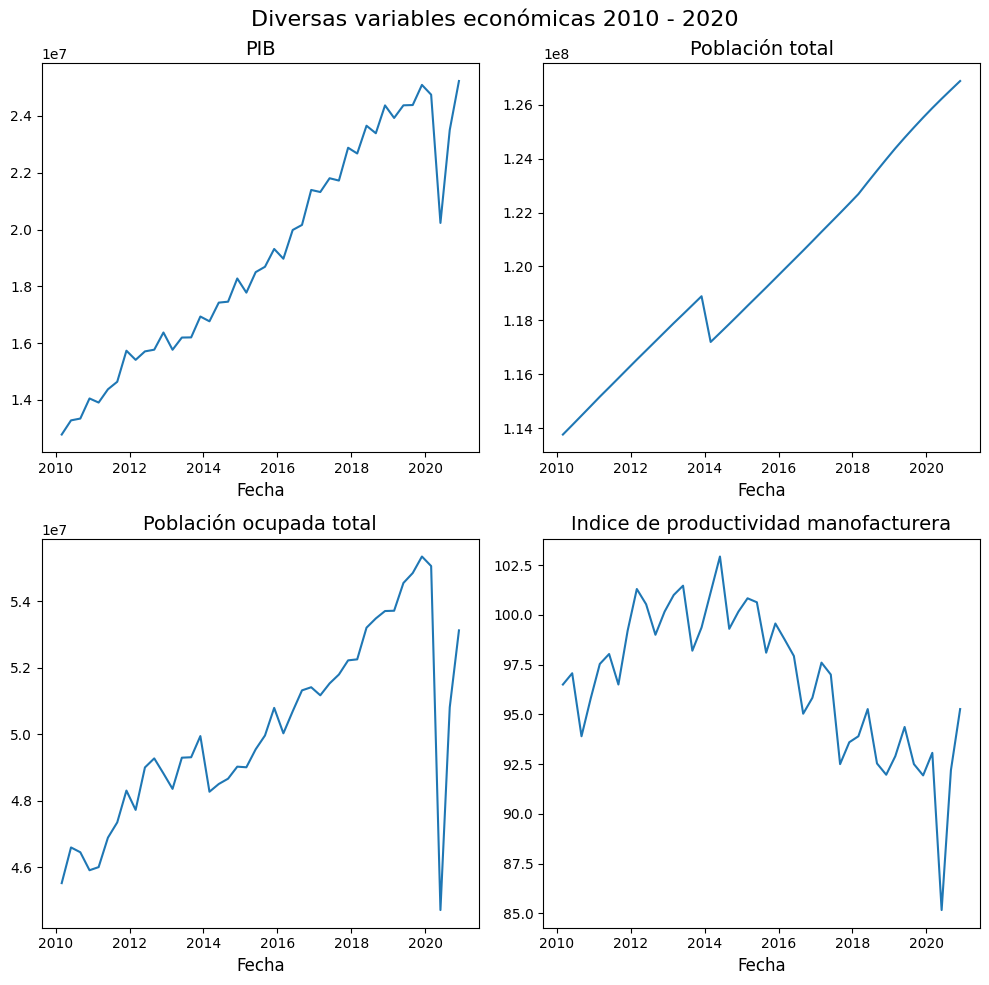

In [82]:
# Finalmente podemos realizar un gráfico para  ilustrar el comportamiento de los datos en el periodo 2010-2020
# creamos una figura y subplots
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))
# Colocamos un titulo general
fig.suptitle('Diversas variables económicas 2010 - 2020', fontsize=16)

# Definimos los nombres en gráficas
nombres = ['PIB', 'pob_t', 'pob_oc_to', 'ipm']
nom_g = ['PIB', 'Población total', 'Población ocupada total', 'Indice de productividad manofacturera']
# Recorrer cada columna y graficar en su respectivo subplot
for i, c in enumerate(nombres[0:4]):
    row = i // 2  # Calcular el número de fila
    col = i % 2   # Calcular el número de columna
    axs[row, col].plot(datos[c])
    axs[row, col].set_title(nom_g[i], fontsize=14)
    axs[row, col].set_xlabel('Fecha', fontsize=12)
#    axs[row, col].set_ylabel(colsor[i], fontsize=12)

# Ajustar la disposición de los subplots y mostrar la gráfica
plt.tight_layout()
plt.show()

In [98]:
# Incluso podemos hacer gráficos interactivos...
# Definimos los nombres en gráficas
nombres = ['PIB', 'pob_t', 'pob_oc_to', 'ipm']
nom_g = ['PIB', 'Población total', 'Población ocupada total', 'Indice de productividad manofacturera']
# Aplicamos una función bucle para cada gráfico
lista = []
for c in nombres[0:4]:
    cg = go.Scatter(
        x=datos.index,
        y=datos[c],
        mode='lines',
        name=c
    )
    lista.append(cg)

# Hacemos una figura con los subplots
fig = make_subplots(rows=2, cols=2, subplot_titles=nom_g)

# Agregamos la lista
for cg in lista:
    fig.add_trace(cg, row=(lista.index(cg) // 2) + 1, col=(lista.index(cg) % 2) + 1)

# Título general y de los ejes
fig.update_layout(
    title="Diversas variables económicas 2010 - 2020",
    xaxis_title="Fecha",
)
# Mostramos la figura
fig.show()


Hasta aquí hemos aprendido como descargar y depurar datos provenientes de la API de INEGI, así como tener una breve visualización de los mismos.